In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay,f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn import tree

In [56]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [57]:
def cal_accuracy(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    print("Accuracy : ",accuracy_score(y_test, y_pred))
    print("Report : ",classification_report(y_test, y_pred))

In [58]:
def plot_decision_tree(clf_object):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True,rounded=True)
    plt.show()

Predicted values:
['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M']
(569, 32)
['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M']
Accuracy :  0.9473684210526315
Report :     

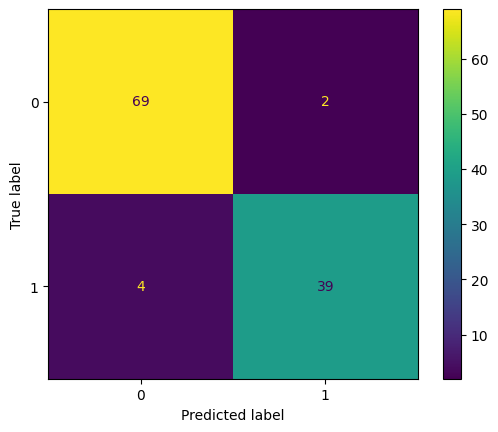

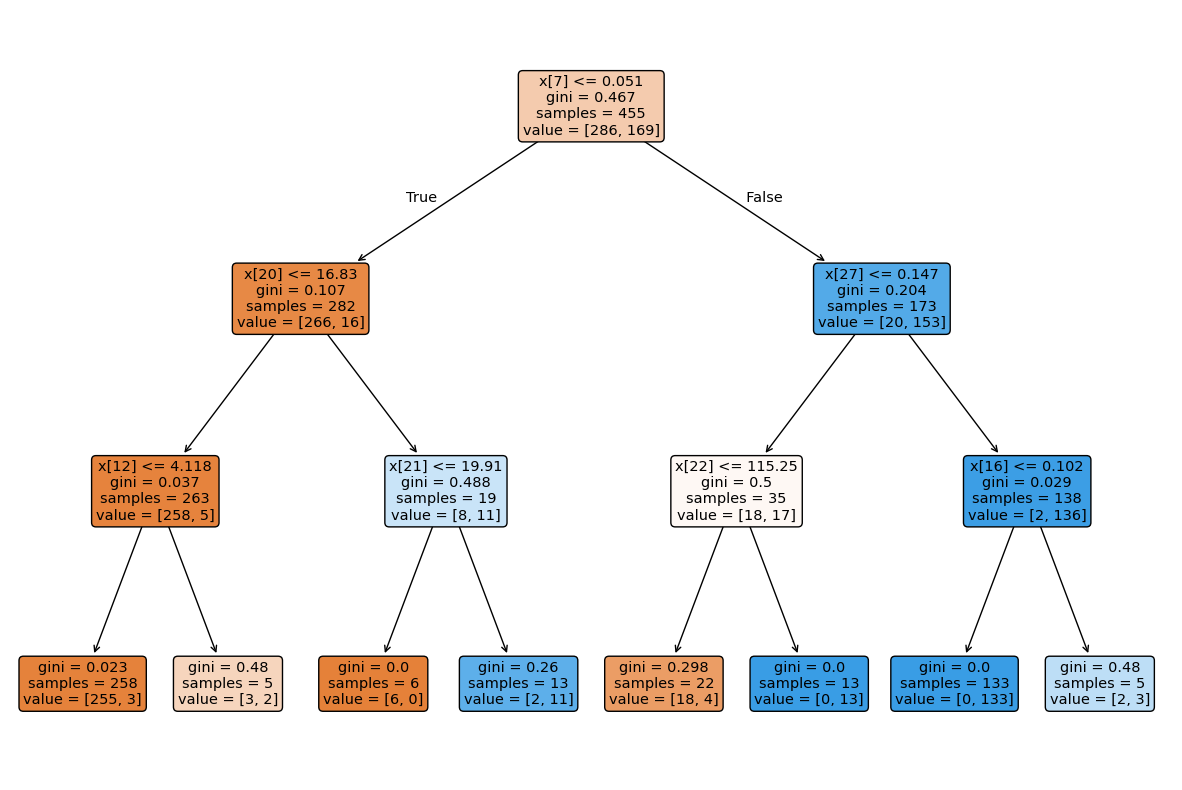

In [59]:
bc_data=pd.read_csv(r"C:\Users\swami\Downloads\Dataset\breast-cancer.csv",header=None,sep=',')
X=bc_data.values[:,2:]
Y=bc_data.values[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)
Y_pred_gini=prediction(X_test,clf_gini)
print(bc_data.shape)
print(Y_pred_gini)
cal_accuracy(Y_test,Y_pred_gini)
plot_decision_tree(clf_gini)

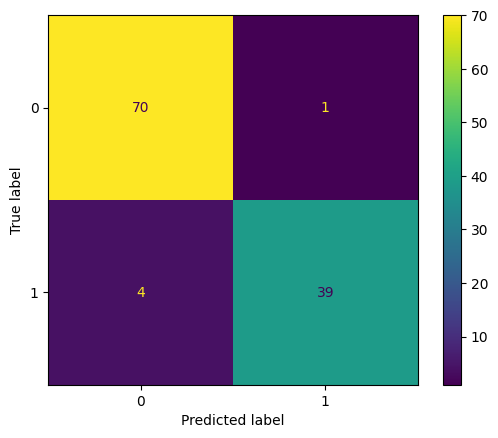

Accuracy: 0.956140350877193
F1 Score: 0.9397590361445783


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = SVC(kernel="linear", gamma=0.5, C=1.0)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
confusionmatrix=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
disp.plot()
plt.show()
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_score(Y_test, Y_pred, pos_label='M')}")